In [1]:
llm_config = {"model": "llama3",
              "base_url": "http://localhost:11434/v1",
              "api_key": "ollama"}

In [2]:
from autogen import ConversableAgent

/home/irman/anaconda3/envs/autogen_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


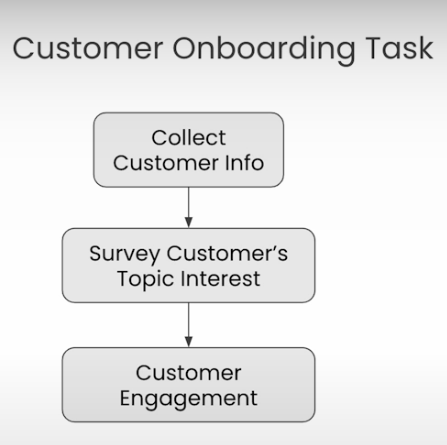

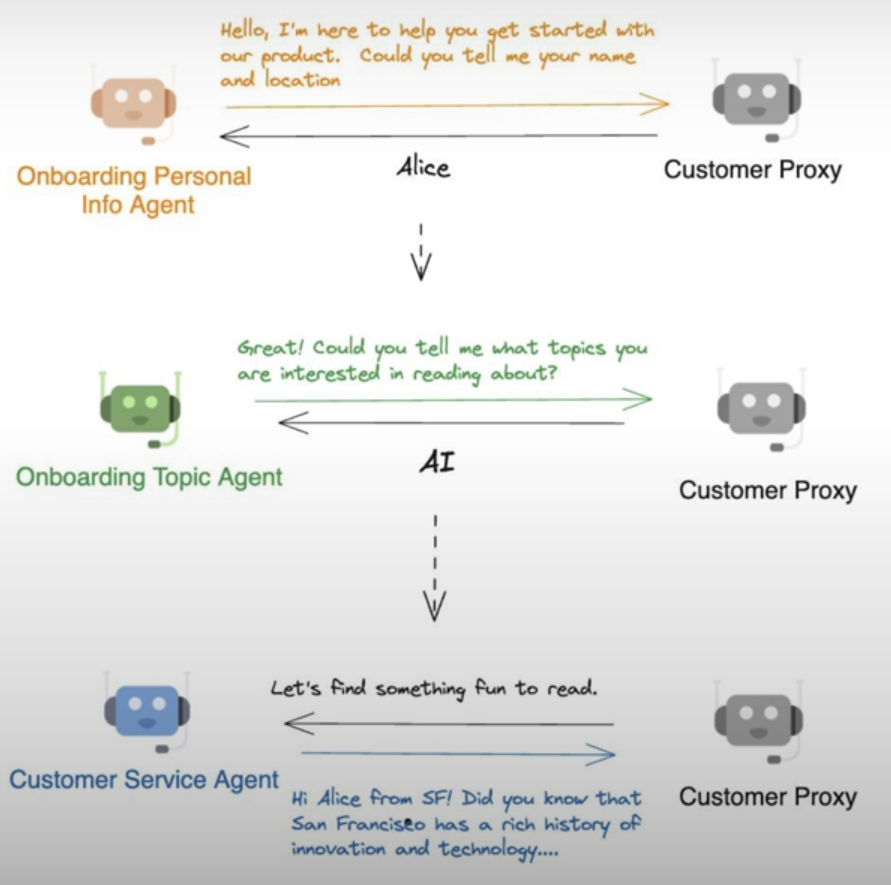

In [3]:
onboarding_personal_info_agent = ConversableAgent(
    name="onboarding personal info agent",
    system_message="You're a helpful customer onboarding agent"
    "you're here to help customers get started with our product"
    "your job is to gather customer's name and location"
    "do not ask for any other information"
    "return 'TERMINATE' when you have gathered all the information",
    llm_config=llm_config,
    human_input_mode="NEVER",
    code_execution_config=False
)

In [4]:
ononboarding_topic_preference_agent = ConversableAgent(
    name="onboarding topic preference agent",
    system_message="You're a helpful customer onboarding agent"
    "you're here to help customers get started with our product"
    "your job is to gather customer's news topic preference"
    "do not ask for any other information"
    "return 'TERMINATE' when you have gathered all the information",
    llm_config=llm_config,
    human_input_mode="NEVER",
    code_execution_config=False
)

In [5]:
customer_service_agent = ConversableAgent(
    name="customer service agent",
    system_message="You're a helpful customer service agent"
    "you're here to provide fun for customer based on the user's personal information and news topic preference"
    "This could be a joke, a fun fact, a news article, or an interesting story"
    "make sure to make it fun and engaging"
    "your job is to gather customer's name and location"
    "return 'TERMINATE' when you have gathered all the information",
    llm_config=llm_config,
    human_input_mode="NEVER",
    code_execution_config=False,
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower()
)

In [6]:
customer_proxy_agent = ConversableAgent(
    name="customer proxy agent",
    llm_config=False,
    human_input_mode="ALWAYS",
    code_execution_config=False,
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower()
)

In [11]:
# create chat

chats = [
    {
        "sender": onboarding_personal_info_agent,
        "recipient": customer_proxy_agent,
        "message":
            "Hello, I'm here to help you get started with our product."
            "Could you tell me your name and location?",
        "summary_method": "reflection_with_llm",
        "summary_args": {
            "summary_prompt": "Return the customer information"
                              "into as JSON object only: "
                              "{name: '', location: ''}",
        },
        "max_turns": 2,
        "clear_history": True,  
    },
    {
        "sender": ononboarding_topic_preference_agent,
        "recipient": customer_proxy_agent,
        "message": "Great! could you tell me whay topics you're interested in?",
        "summary_method": "reflection_with_llm",
        "max_turns": 1,
        "clear_history": False,
    },
    {
        "sender": customer_proxy_agent,
        "recipient": customer_service_agent,
        "message": "Let's find something fun to read",
        "summary_method": "reflection_with_llm",
        "max_turns": 1,
    },
]

In [13]:
from autogen import initiate_chats

chat_results = initiate_chats(chats)


********************************************************************************
Starting a new chat....

********************************************************************************
onboarding personal info agent (to customer proxy agent):

Hello, I'm here to help you get started with our product.Could you tell me your name and location?

--------------------------------------------------------------------------------
customer proxy agent (to onboarding personal info agent):

i am irman from bandung, indonesia

--------------------------------------------------------------------------------
[autogen.oai.client: 06-18 18:25:48] {294} WARNING - Model llama3 is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
onboarding personal info agent (to customer proxy agent):

Got it! Thank you, Irman. I've got your name and location: Irman from Bandung, Indonesia. That's all the information 

In [14]:
for ch in chat_results:
    print(ch.chat_history)
    print('\n')

[{'content': "Hello, I'm here to help you get started with our product.Could you tell me your name and location?", 'role': 'assistant'}, {'content': 'i am irman from bandung, indonesia', 'role': 'user'}, {'content': "Got it! Thank you, Irman. I've got your name and location: Irman from Bandung, Indonesia. That's all the information I need for now. TERMINATE", 'role': 'assistant'}, {'content': 'okay', 'role': 'user'}]


[{'content': "Great! could you tell me whay topics you're interested in?\nContext: \nIrman", 'role': 'assistant'}, {'content': 'robotics-AI', 'role': 'user'}, {'content': "Great! could you tell me whay topics you're interested in?\nContext: \nokay", 'role': 'assistant'}, {'content': 'robotics', 'role': 'user'}]


[{'content': "Let's find something fun to read\nContext: \nokay\nrobotics", 'role': 'assistant'}, {'content': "Fun topic! I'm going to need a little more info from you. Can you please tell me:\n\n1. What is your name?\n\n(Type away, and remember, I'm all ears!)"

In [15]:
for ch in chat_results:
    print(ch.summary)
    print('\n')

okay


robotics


Fun topic! I'm going to need a little more info from you. Can you please tell me:

1. What is your name?

(Type away, and remember, I'm all ears!)




In [16]:
for ch in chat_results:
    print(ch.cost)
    print('\n')

{'usage_including_cached_inference': {'total_cost': 0, 'llama3': {'cost': 0, 'prompt_tokens': 309, 'completion_tokens': 57, 'total_tokens': 366}}, 'usage_excluding_cached_inference': {'total_cost': 0, 'llama3': {'cost': 0, 'prompt_tokens': 309, 'completion_tokens': 57, 'total_tokens': 366}}}


{'usage_including_cached_inference': {'total_cost': 0, 'llama3': {'cost': 0, 'prompt_tokens': 138, 'completion_tokens': 8, 'total_tokens': 146}}, 'usage_excluding_cached_inference': {'total_cost': 0, 'llama3': {'cost': 0, 'prompt_tokens': 138, 'completion_tokens': 8, 'total_tokens': 146}}}


{'usage_including_cached_inference': {'total_cost': 0, 'llama3': {'cost': 0, 'prompt_tokens': 480, 'completion_tokens': 340, 'total_tokens': 820}}, 'usage_excluding_cached_inference': {'total_cost': 0, 'llama3': {'cost': 0, 'prompt_tokens': 480, 'completion_tokens': 340, 'total_tokens': 820}}}


